In [2]:
# Import necessary libraries

import pandas as pd  # Pandas helps in data manipulation and analysis
import numpy as np   # NumPy is used for numerical calculations
import matplotlib.pyplot as plt  # Matplotlib is used for creating plots and graphs
import seaborn as sns  # Seaborn is used for making nicer, more attractive plots


In [139]:
# Load the transaction data (Dataset-1)
df_transactions = pd.read_csv("C:/Users/anura/Downloads/iGnosis Tech/Dataset/transaction_data.csv")
# This reads the CSV file located at the given path and loads it into a DataFrame called df_transactions.

# Preview the data to understand its structure
df_transactions.head()
# This displays the first 5 rows of the DataFrame, helping us understand the columns and structure of the data.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [140]:
# Check for missing values and duplicates for transactions dataset

df_transactions.isnull().sum()
# This checks for any missing (NaN) values in the DataFrame 'df_transactions'.
# .isnull() returns a boolean DataFrame, where True indicates a missing value.
# .sum() adds up the number of True values (i.e., missing values) for each column.

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Hence, there is no null values for transactions dataset

In [141]:
# Check the overall info of the transactions dataset
df_transactions.info()
# This function provides a summary of the DataFrame, including the number of non-null values, data types of columns, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
# The total number of transactions made by customers on the basis of their loyalty card number
df_transactions['LYLTY_CARD_NBR'].nunique()
# This calculates the number of unique loyalty card numbers in the 'LYLTY_CARD_NBR' column.
# .nunique() returns the count of distinct values in the specified column.

72637

Here, we can conclude that we have total '72637' unique customers.

In [142]:
# Total number of the stores from which the transactions were made
df_transactions['STORE_NBR'].nunique()
# This calculates the number of unique stores based on the 'STORE_NBR' column.
# .nunique() returns the count of distinct store numbers (i.e., unique stores).

272

In [143]:
# Max Quantity of the products purchased
df_transactions['PROD_QTY'].nunique()
# This calculates the number of unique quantities of products purchased (distinct values in the 'PROD_QTY' column).
# .nunique() returns the count of distinct quantities.

6

In [144]:
# Unique date on which the transactions were made
df_transactions['DATE'].nunique()
# This calculates the number of unique dates on which transactions occurred based on the 'DATE' column.
# .nunique() returns the count of distinct dates.

364

In [145]:
# Total unique products sold
df_transactions['PROD_NAME'].nunique()
# This calculates the number of unique products sold based on the 'PROD_NAME' column.
# .nunique() returns the count of distinct product names.

114

In [146]:
# Total unique products sold
df_transactions['PROD_NBR'].nunique()
# This calculates the number of unique product numbers sold based on the 'PROD_NBR' column.
# .nunique() returns the count of distinct product numbers.

114

# 1. Top 3 most profitable products

Top selling product on the basis of the no. of transactions of the particular products, means the products which has been purchased maximum no. of times in a fixed quantity.

In [147]:
# Count the occurrences of unique combinations of 'PROD_NAME', 'PROD_QTY', and 'TOT_SALES'
df_transactions[['PROD_NAME', 'PROD_QTY','TOT_SALES']].value_counts().reset_index()
# This counts the number of occurrences of each unique combination of the columns: 'PROD_NAME', 'PROD_QTY', and 'TOT_SALES'.
# .value_counts() returns the frequency of each unique combination of these three columns.
# .reset_index() is used to convert the result into a DataFrame and reset the index for better readability.

,PROD_NAME,PROD_QTY,TOT_SALES,count
0,Kettle Mozzarella Basil & Pesto 175g,2,10.8,3004
1,Cobs Popd Sea Salt Chips 110g,2,7.6,2979
2,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,2961
3,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,2950
4,Tostitos Splash Of Lime 175g,2,8.8,2936
...,...,...,...,...
571,Dorito Corn Chp Supreme 380g,3,19.5,1
572,Cheetos Chs & Bacon Balls 190g,5,16.5,1
573,CCs Tasty Cheese 175g,3,6.3,1
574,Cobs Popd Sea Salt Chips 110g,4,15.2,1


So from this we can conclude that the top 3 selling products on the basis of the quantity and total sales are :

In [148]:
# Get the top 3 most frequent combinations of 'PROD_NAME', 'PROD_QTY', and 'TOT_SALES'
df_transactions[['PROD_NAME', 'PROD_QTY', 'TOT_SALES']].value_counts().reset_index().head(3)
# This first counts the occurrences of each unique combination of 'PROD_NAME', 'PROD_QTY', and 'TOT_SALES'.
# .value_counts() returns the frequency of each unique combination.
# .reset_index() turns the result into a DataFrame with proper column names.
# .head(3) returns the top 3 rows, showing the most frequent combinations.

,PROD_NAME,PROD_QTY,TOT_SALES,count
0,Kettle Mozzarella Basil & Pesto 175g,2,10.8,3004
1,Cobs Popd Sea Salt Chips 110g,2,7.6,2979
2,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,2961


In [149]:
# Set the figure size for the plot
plt.figure(figsize=(8, 8))
# This creates a new figure (or canvas) with a specified size (width=8 inches, height=8 inches).

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [150]:
# Define a custom function to display the count only
def func(pct, allvalues):
    # Calculate the absolute count by multiplying the percentage (pct) by the sum of all values
    absolute = int(pct / 100. * sum(allvalues))  # Calculate the count
    return f"{absolute}"  # Only show the count as an integer

In [151]:
# Getting the value counts for combinations of 'PROD_NAME' and 'TOT_SALES'
counts = df_transactions[['PROD_NAME', 'TOT_SALES']].value_counts().head(3)
# This counts how many times each unique combination of 'PROD_NAME' and 'TOT_SALES' appears in the dataset.
# .value_counts() returns the frequency of each unique pair of product name and total sales.
# .head(3) selects the top 3 most frequent combinations (based on product and total sales).

# Extract the actual values (counts) from the result
count_values = counts.values
# This extracts the frequency counts (numbers) from the 'counts' Series and stores them in the variable 'count_values'.
# 'counts.values' gives the count numbers without the index (the product and sales pair).

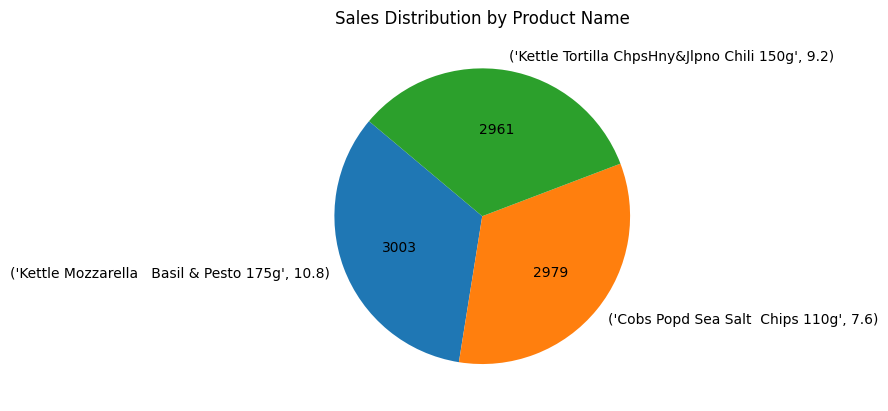

In [152]:
# Plot the pie chart of top 3 selling products on the basis of the total sales.

# Set the title for the pie chart
plt.title('Sales Distribution by Product Name')

# Create the pie chart
plt.pie(count_values, 
        labels=counts.index, 
        autopct=lambda pct: func(pct, count_values),  # Custom function to show counts
        startangle=140)  # Set the starting angle to make the chart visually appealing

# Show the plot
plt.show()

Top selling product on the basis of Total sales, means the products which has been sold in a fixed quantity and there total sales is high.

In [153]:
# Group by product number and name, sum the sales, and reset index to get total sales for each product
df_product_sales = df_transactions.groupby(['PROD_NBR', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()
# This groups the data by both 'PROD_NBR' (product number) and 'PROD_NAME' (product name).
# Then, it calculates the total sales for each group by summing up 'TOT_SALES' for each combination.
# .reset_index() is used to convert the result into a DataFrame and reset the index for better readability.

# Sort the products by total sales in descending order to get the top 3
top_3_products = df_product_sales.sort_values(by='TOT_SALES', ascending=False).head(3)
# .sort_values() sorts the DataFrame by the 'TOT_SALES' column in descending order.
# .head(3) selects the top 3 rows, showing the top 3 products with the highest total sales.

# Display the top 3 products
top_3_products
# This will display the DataFrame containing the top 3 products with the highest total sales.

,PROD_NBR,PROD_NAME,TOT_SALES
3,4,Dorito Corn Chp Supreme 380g,40352.0
13,14,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
15,16,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


Text(0.5, 1.0, 'Top 3 Products by Total Sales')

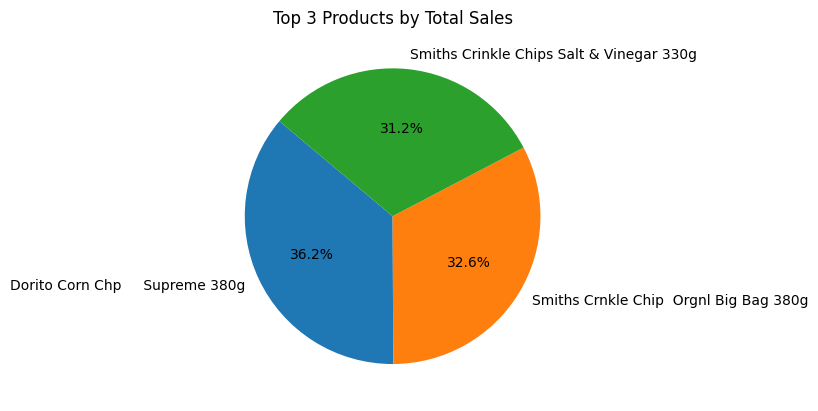

In [154]:
# Plotting the pie chart for the top 3 products
plt.pie(top_3_products['TOT_SALES'], labels=top_3_products['PROD_NAME'], autopct='%1.1f%%', startangle=140)
# 'top_3_products['TOT_SALES']': This is the data (total sales) used for the pie chart, representing the size of each slice.
# 'labels=top_3_products['PROD_NAME']': These are the labels for each slice, representing the names of the top 3 products.
# 'autopct='%1.1f%%'': This formats the percentage labels on the pie chart slices, showing one decimal place (e.g., 33.3%).
# 'startangle=140': This rotates the pie chart to start the first slice at 140 degrees, for better visual presentation.

# Adding a title
plt.title('Top 3 Products by Total Sales')
# This sets the title of the pie chart to describe what the chart represents (i.e., the top 3 products based on total sales).

In [155]:
# Load the customer data (Dataset-2)
df_customers = pd.read_csv("C:/Users/anura/Downloads/iGnosis Tech/Dataset/purchase_behaviour.csv")

# Display the first few rows of the customer data to understand its structure
df_customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [156]:
# Check for missing values in the 'df_customers' dataset
df_customers.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Hence, there is no null for purchase_behaviour dataset

In [157]:
# Access the 'PREMIUM_CUSTOMER' column from the 'df_customers' DataFrame
df_customers['PREMIUM_CUSTOMER'].nunique()
# This line looks at the 'PREMIUM_CUSTOMER' column, which contains values like 'Premium','Mainstream' and 'Budget'.
# .nunique() is then called on this column to count how many unique values are present.
# The result will tell us how many distinct values are in the 'PREMIUM_CUSTOMER' column (typically 0 and 1).

3

So, we have total 3 categories of premium customers

In [102]:
# Count the number of unique values in the 'LIFESTAGE' column of the df_customers DataFrame
df_customers['LIFESTAGE'].nunique()
# This line checks the 'LIFESTAGE' column, which categorizes customers by their life stage (e.g. 'YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES' etc).
# .nunique() is used to count how many distinct life stages exist in the data.
# The result will indicate how many different categories or unique life stages are present in the 'LIFESTAGE' column.

7

So, we have total 7 categories of Lifestage of the customers

We need to combine both datasets so we can analyze customer segments alongside transaction details.

In [158]:
# Merge the 'df_transactions' dataset with 'df_customers' dataset on the 'LYLTY_CARD_NBR' column to combine customer info with transaction data
df_combined = pd.merge(df_transactions, df_customers, on='LYLTY_CARD_NBR', how='left')

# Check the merged data by displaying the first few rows
df_combined.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [159]:
# Get detailed information about the 'df_combined' DataFrame, such as the number of entries, column data types, and any missing values
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


# 2. Characteristics of most loyal customers

In [160]:
# Calculate total sales and number of transactions for each customer
df_customer_loyalty = df_combined.groupby('LYLTY_CARD_NBR').agg(
    total_sales=('TOT_SALES', 'sum'),        # Sum of TOT_SALES to calculate total sales per customer
    transaction_count=('TXN_ID', 'nunique')  # Count of unique transactions (TXN_ID) per customer
).reset_index()  # Reset the index to get a clean DataFrame

# Define loyal customers (customers with more than 14 transactions as per my findings)
loyal_customers = df_customer_loyalty[df_customer_loyalty['transaction_count'] > 14]
# Filter the DataFrame to include only customers with more than 14 unique transactions

# Join the loyalty data back with customer characteristics (LIFESTAGE, PREMIUM_CUSTOMER)
loyal_customers_info = pd.merge(loyal_customers, df_customers[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']], on='LYLTY_CARD_NBR', how='left')
# Merge the 'loyal_customers' DataFrame with the 'df_customers' DataFrame on 'LYLTY_CARD_NBR'
# This brings in the 'LIFESTAGE' and 'PREMIUM_CUSTOMER' information for each loyal customer

# Display loyal customers with their characteristics
loyal_customers_info

,LYLTY_CARD_NBR,total_sales,transaction_count,LIFESTAGE,PREMIUM_CUSTOMER
0,13138,109.0,17,YOUNG FAMILIES,Mainstream
1,13177,104.6,15,MIDAGE SINGLES/COUPLES,Premium
2,23192,114.7,15,OLDER FAMILIES,Budget
3,28020,115.6,15,OLDER FAMILIES,Premium
4,30162,99.6,15,YOUNG FAMILIES,Premium
5,32060,114.0,15,YOUNG FAMILIES,Budget
6,32210,99.0,15,YOUNG SINGLES/COUPLES,Mainstream
7,43109,92.4,15,OLDER FAMILIES,Premium
8,63197,132.8,15,OLDER FAMILIES,Budget
9,94185,122.8,16,YOUNG FAMILIES,Premium


This data allows you to identify your loyal customers based on their purchasing behavior (more than 14 transactions) and understand their characteristics like life stage and whether they are premium customers. This can help in targeting specific marketing campaigns or product recommendations to loyal customers.

In [162]:
# Group by customer characteristics (LIFESTAGE, PREMIUM_CUSTOMER) and calculate the average total sales
loyal_customer_segments = loyal_customers_info.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['total_sales'].mean().reset_index()

# Sort the segments by average total sales in descending order
loyal_customer_segments = loyal_customer_segments.sort_values(by='total_sales', ascending=False)

# Display the most profitable loyal customer segments
loyal_customer_segments.reset_index(drop=True)

,LIFESTAGE,PREMIUM_CUSTOMER,total_sales
0,OLDER FAMILIES,Budget,116.671429
1,RETIREES,Budget,115.600000
2,OLDER SINGLES/COUPLES,Premium,112.100000
3,MIDAGE SINGLES/COUPLES,Premium,110.000000
4,YOUNG FAMILIES,Budget,109.900000
5,YOUNG SINGLES/COUPLES,Mainstream,109.550000
6,OLDER SINGLES/COUPLES,Budget,109.100000
7,YOUNG FAMILIES,Mainstream,109.000000
8,YOUNG FAMILIES,Premium,108.375000
9,OLDER FAMILIES,Mainstream,105.425000


This analysis helps in identifying which customer segments (based on their life stage and premium membership status) are most profitable. For example, if "Senior" customers who are "Premium" generate the highest average sales, the marketing team may focus on creating more targeted promotions for this segment.

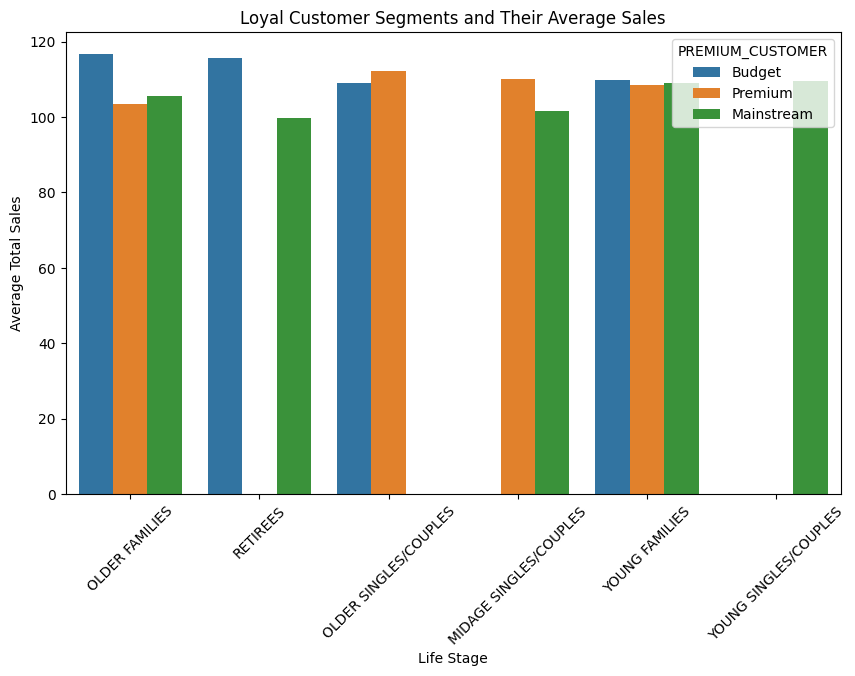

In [163]:
# Create a vertical bar plot
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.barplot(x='LIFESTAGE', y='total_sales', hue='PREMIUM_CUSTOMER', data=loyal_customer_segments)

# Customize the plot
plt.title('Loyal Customer Segments and Their Average Sales')  # Add a title to the plot
plt.xlabel('Life Stage')  # Label the x-axis
plt.ylabel('Average Total Sales')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

Let's hypothesis why some customer groups show more loyalty based on what we found:

Premium Customers: These folks spend more because they can buy special stuff. They might stick around because they think they're getting their money's worth.

Retired Customers: People who've stopped working might have more time to shop. They might go for things that keep them healthy, comfy, or entertained.

Working Professionals: These customers might shop around more if they're watching their wallet or want quick and easy shopping options.

To wrap up:
This breakdown helps us spot the most profitable items and the customers who keep coming back. When we put together what people buy and who they are, we learn a lot. This can help us make our marketing better and put our products in the right spots.
